### Newton-Raphson Method
Newton's method is a root-finding algorithm which produces successively better approximations to the roots (or zeroes) of a function.

The idea is to start with an initial guess, then to approximate the function by its tangent line $g(x)$, and finally to compute the $x$-intercept of this tangent line.

$$g(x) = f(x_0) + f^{'}(x_0)(x-x_0)$$

This $x$-intercept will typically be a better approximation to the original function's root than the first guess, and the method can be iterated.

If the tangent line to the curve $f(x)$ at $x = x_0$ intercepts the $x$-axis at $x_{1}$ then

\begin{cases}
f(x_1) < \text{tol}=10^{-8} \Rightarrow \text{ zero found !}\\
g(x_1) = f(x_0) + f^{'}(x_0)(x_1-x_0) = 0 \Rightarrow \text{ solve for
}x_1\text{ and iterate...}
\end{cases}

\begin{equation}
f'(x_0)(x_0-x_1)=f(x_0)-0
\end{equation}

Solving for $x_1$ gives
\begin{equation}
	x_1=x_0-\frac {f(x_0)}{f'(x_0)}
\end{equation}

We start the process with some arbitrary initial value $x_0$ (the closer to the zero, the better). The method will usually converge, provided this initial guess is close enough to the unknown zero, and that $f'(x_0) \neq 0$.


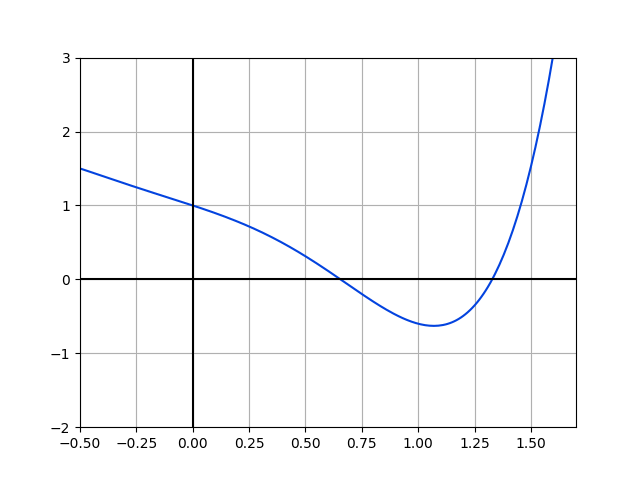

In [ ]:
from IPython.display import Image
Image(filename='/content/drive/MyDrive/advanced_modeling/Notebooks/06_animated_newton_method.gif')

#### Exercise

Using the Newton-Raphson method determine the implied volatility for a **call** option with

$S_0=30, K=28, T=0.25, r=2.5\%, P=4.31$

In [ ]:
import numpy as np

from scipy.stats import norm

def d_plus(St, K, r, sigma, ttm):
    num = np.log(St/K) + (r + 0.5*sigma**2)*(ttm)
    den = sigma*np.sqrt(ttm)
    return num/den

def d_minus(St, K, r, sigma, ttm):
    return d_plus(St, K, r, sigma, ttm) - sigma*np.sqrt(ttm)

def BS(St, K, r, sigma, ttm, option_type):
    if type(ttm) == list:
        ttm = np.array([t for t in ttm])

    d1 = option_type*d_plus(St, K, r, sigma, ttm)
    d2 = option_type*d_minus(St, K, r, sigma, ttm)
    return option_type*(St*norm.cdf(d1) - K*np.exp(-r*(ttm))*norm.cdf(d2))

In [ ]:
from scipy.optimize import newton

vols = []
prices = []

def implied_vol(sigma, S0, K, r, T, market_price, flag=1):
  bs_price = BS(S0, K, r, sigma, T, flag)
  vols.append(sigma)
  prices.append(bs_price)
  return bs_price - market_price

S0, K, T, r = 30, 28, 0.25, 0.025
market_price = 4.311109723696367
imp_sigma = newton(implied_vol, 0.1, args=(S0, K, r, T, market_price))
print (f"Implied Volatility: {imp_sigma:.4f}")

Implied Volatility: 0.5400


In [ ]:
bs_prices = []
xvals = np.arange(0.01, 1.5, 0.01)
for sigma in np.arange(0.01, 1.5, 0.01):
  bs_prices.append(BS(S0, K, r, sigma, T, 1))

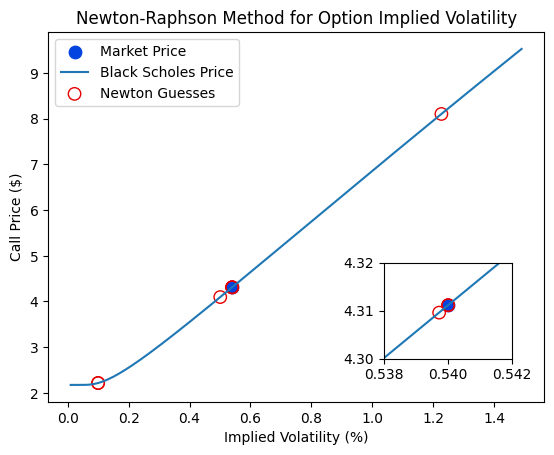

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title('Newton-Raphson Method for Option Implied Volatility')
plt.ylabel('Call Price ($)')
plt.xlabel('Implied Volatility (%)')
ax.scatter(0.54, market_price, s=80, marker='o', color='xkcd:blue', label = 'Market Price')
ax.plot(xvals, bs_prices, label = 'Black Scholes Price')
ax.scatter(vols, prices, s=80, facecolors='none', edgecolors='xkcd:red', label='Newton Guesses')

ax.legend(loc='upper left')

a = plt.axes([.65, .2, .2, .2], facecolor=None)
a.scatter(0.54, market_price, s=80,  marker='o', color='xkcd:blue', label = 'Market Price')
a.plot(xvals, bs_prices, label = 'Black Scholes Price')
a.scatter(vols, prices, s=80, facecolors='none', edgecolors='xkcd:red')
a.set_xlim(0.538, 0.542)
a.set_ylim(4.3, 4.32)

plt.show()